In [1]:
#necessary Libraries
import numpy as np
import pandas as pd
import time
import pprint

#Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
# magic word for producing visualizations in notebook
%matplotlib inline

#Preprocessing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA 
from scipy.sparse import lil_matrix
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#Models
from sklearn.naive_bayes import GaussianNB
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset
from skmultilearn.adapt import MLkNN
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

#Scoring Metrics
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics
from sklearn.metrics import f1_score, fbeta_score
from sklearn.metrics import accuracy_score

In [2]:
# Load the dataset
file_path = r'C:\Users\Thesis2.0\django_thesis\Dataset\Data Gathering (Thesis 2)\ap_data_8r - Smaller Sample Size.csv'
ap_data = pd.read_csv(file_path)

In [3]:
# Check the structure of the data after it's loaded 
#(print the number of rows and columns).
num_rows, num_cols  = ap_data.shape
print('Number of columns: {}'.format(num_cols))
print('Number of rows: {}'.format(num_rows))

Number of columns: 8
Number of rows: 34249


In [4]:
#Check the columns names
col_names = ap_data.columns.values
col_names

array(['mac_address', 'ssid', 'channel', 'source', 'signal_strength',
       'floorid', 'timestamp', 'roomid'], dtype=object)

In [5]:
#check for missing values
missing_values_count = ap_data.isnull().sum()
#uncomment this if you want to see the count of missing data per column
#missing_values_count

# how many total missing values do we have?
total_cells = np.product(ap_data.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
missing_percent = (total_missing/total_cells) * 100

print('Percent of missing data = {}%'.format(missing_percent))

Percent of missing data = 0.0%


In [6]:
# Add a new column 'source_without_C' by removing 'C' from 'source'
ap_data['ssid'] = ap_data['ssid'].str.replace('C', '')

# Convert the 'source_without_C' column to numeric
ap_data['ssid'] = pd.to_numeric(ap_data['ssid'], errors='coerce')

In [7]:
#Assess unique values per columns
#unique_mac_address = ap_data["mac_address"].unique()
unique_ssid = ap_data["ssid"].unique()
unique_channel = ap_data["channel"].unique()
unique_floorid = ap_data["floorid"].unique()
unique_roomid = ap_data["roomid"].unique()

#print('Unique Mac Address : {}'.format(unique_mac_address))
print('Unique SSID : {}'.format(unique_ssid))
print('Unique Channel : {}'.format(unique_channel))

# Assuming unique_floorid is a NumPy array or a pandas Series
unique_floorid_sorted = np.sort(unique_floorid)

print('Unique Floor ID (Sorted):', unique_floorid_sorted)

print('Unique Room ID : {}'.format(unique_roomid))

unique_floorid_count = ap_data["floorid"].nunique()
print(f'Number of Unique Floor IDs: {unique_floorid_count}')

Unique SSID : [2 1]
Unique Channel : [2462 2452 2447 2457 2422 2417 2412 2427 2442 2437 2432]
Unique Floor ID (Sorted): [  1   4   7  10  13  16  19  22  25  28  31  34  37  40  43  46  49  52
  55  58  61  64  67  70  73  76  79 103 106 109 112 115 118 121 124 127
 130 133 136 139 142 145 148 151 154 157 160 163 166 169 172 175 178 181
 184 187 190 193 196 199 202 205 208 211 214 217 220 223 226 229 232 235
 238 241 244 247 250 253 256 259 262 265 268 271 274 277 280 283 286 289
 292 295 298 301 304 307 310 313 316 319 322 325 328 331 334 337 340 343
 346 349 352 355 358 361 364 367 370 373 376]
Unique Room ID : [214 213 111]
Number of Unique Floor IDs: 119


In [8]:
ap_data = ap_data.drop(['mac_address'], axis=1)

#Check the columns names
col_names = ap_data.columns.values
col_names

array(['ssid', 'channel', 'source', 'signal_strength', 'floorid',
       'timestamp', 'roomid'], dtype=object)

In [9]:
# Define the columns for duplication check
duplication_columns = ['ssid', 'channel', 'source', 'signal_strength', 'floorid']

# Count the number of occurrences for each combination of columns
ap_data['duplication_count'] = ap_data.groupby(duplication_columns)['ssid'].transform('count')

# Filter rows where duplication count is greater than or equal to 4
filtered_data = ap_data[ap_data['duplication_count'] >= 4]

# Save the result to a new CSV file or modify the original dataframe as needed
#filtered_data.to_csv('filtered_data.csv', index=False)

print(filtered_data)

# Group by duplication columns and aggregate values using, for example, the mean
merged_data = filtered_data.groupby(duplication_columns, as_index=False).mean()

# Drop the 'duplication_count' column if you don't need it in the final result
merged_data = merged_data.drop(columns=['duplication_count'])

# Save the result to a new CSV file or modify the original dataframe as needed
#merged_data.to_csv('Data_Filtering.csv', index=False)

print(merged_data)

       ssid  channel source  signal_strength  floorid         timestamp  \
2         1     2452   cap2              -65        1  13/12/2023 16:21   
4         1     2462   cap1              -78        1  13/12/2023 16:21   
5         2     2462   cap2              -61        1  13/12/2023 16:21   
6         1     2462   cap2              -58        1  13/12/2023 16:21   
8         1     2462   cap1              -78        1  13/12/2023 16:21   
...     ...      ...    ...              ...      ...               ...   
34243     2     2427   cap3              -66      376  13/12/2023 16:21   
34245     1     2432   cap2              -83      376  13/12/2023 16:21   
34246     2     2417   cap1              -77      376  13/12/2023 16:21   
34247     1     2432   cap1              -91      376  13/12/2023 16:21   
34248     1     2432   cap2              -83      376  13/12/2023 16:21   

       roomid  duplication_count  
2         214                  6  
4         214                

In [10]:
#Assess unique values per columns
#unique_mac_address = ap_data["mac_address"].unique()
unique_ssid = merged_data["ssid"].unique()
unique_channel = merged_data["channel"].unique()
unique_floorid = merged_data["floorid"].unique()
unique_roomid = merged_data["roomid"].unique()

#print('Unique Mac Address : {}'.format(unique_mac_address))
print('Unique SSID : {}'.format(unique_ssid))
print('Unique Channel : {}'.format(unique_channel))
print('Unique Floor ID : {}'.format(unique_floorid))
print('Unique Room ID : {}'.format(unique_roomid))

unique_floorid_count = merged_data["floorid"].nunique()
print(f'Number of Unique Floor IDs: {unique_floorid_count}')


Unique SSID : [1 2]
Unique Channel : [2412 2417 2422 2427 2432 2437 2442 2447 2452 2457 2462]
Unique Floor ID : [190 217 235 349 331 295 307 328 292 343 334 232 214 226 229 304 220 367
 301 223 313 325 322 298 310 316 346 340 319 337 358 118 148 352 370 277
 136 145 373 160 163 121 166 175 187 124 127 154 196 355 376 364 361 133
 112 181 169 151 142 106 157 103 172 130 178 193 109 184 115 139 205 265
 274 268 283 199 202 262 289 250 253 256 286  61 259 280 271 211  67  55
  73  76   1  10   4  70 208   7  43  16  58  34  19  37  64  46  52  28
  13  22  31 238 244 247 241  25  40  49  79]
Unique Room ID : [111 213 214]
Number of Unique Floor IDs: 119


In [11]:
# Count unique channels for each ssid, floorid, and source
merge_data = merged_data.groupby(['ssid', 'floorid', 'source', 'roomid'])['channel'].nunique().reset_index()

print(merge_data)

     ssid  floorid source  roomid  channel
0       1        1   cap1     214        2
1       1        1   cap2     214        3
2       1        4   cap1     214        1
3       1        4   cap2     214        3
4       1        7   cap1     214        2
..    ...      ...    ...     ...      ...
499     2      373   cap1     111        2
500     2      373   cap2     111        2
501     2      373   cap3     111        4
502     2      376   cap1     111        2
503     2      376   cap3     111        3

[504 rows x 5 columns]


In [12]:
# Define a custom aggregation function to calculate the product
def calculate_product(x):
    return x.prod()

# Group by 'ssid' and 'floorid', then aggregate using the custom function
result = merge_data.groupby(['ssid', 'floorid']).agg({
    'channel': calculate_product
}).reset_index()

# Display the result
print(result)

# Continue from the previous code
total_sum_combination = result['channel'].sum()

# Display the total sum
print("Total Sum of 'channel' values:", total_sum_combination)


     ssid  floorid  channel
0       1        1        6
1       1        4        3
2       1        7        2
3       1       10        3
4       1       13        2
..    ...      ...      ...
233     2      364        9
234     2      367        8
235     2      370       16
236     2      373       16
237     2      376        6

[238 rows x 3 columns]
Total Sum of 'channel' values: 1372


In [13]:
# Count the number of unique sources per 'ssid' and 'floorid'
result_counts = merge_data.groupby(['ssid', 'floorid'])['source'].nunique().reset_index()

# Rename the column to indicate the count of sources
result_counts = result_counts.rename(columns={'source': 'source_count'})

# Display the result
print(result_counts)

# Save the result to a new CSV file or modify the original dataframe as needed
#result_counts.to_csv('source_count.csv', index=False)

     ssid  floorid  source_count
0       1        1             2
1       1        4             2
2       1        7             2
3       1       10             2
4       1       13             2
..    ...      ...           ...
233     2      364             3
234     2      367             2
235     2      370             3
236     2      373             3
237     2      376             2

[238 rows x 3 columns]


In [14]:
# Calculate total RSSI for each unique channel within each ssid, floorid, and source
total_number_rssi = merged_data.groupby(['ssid', 'floorid', 'source', 'channel'])['signal_strength'].nunique().reset_index()

#total_number_rssi.to_csv('total_number_rssi.csv', index=False)

print(total_number_rssi)

      ssid  floorid source  channel  signal_strength
0        1        1   cap1     2457                2
1        1        1   cap1     2462                6
2        1        1   cap2     2452                3
3        1        1   cap2     2457                2
4        1        1   cap2     2462                3
...    ...      ...    ...      ...              ...
1132     2      376   cap1     2412                1
1133     2      376   cap1     2417                2
1134     2      376   cap3     2412                2
1135     2      376   cap3     2417                2
1136     2      376   cap3     2427                8

[1137 rows x 5 columns]


In [15]:
print(merged_data)

      ssid  channel source  signal_strength  floorid  roomid
0        1     2412   cap1              -92      190     111
1        1     2412   cap1              -92      217     111
2        1     2412   cap1              -90      235     111
3        1     2412   cap1              -89      217     111
4        1     2412   cap1              -89      235     111
...    ...      ...    ...              ...      ...     ...
2764     2     2462   cap3              -71      202     111
2765     2     2462   cap3              -71      211     111
2766     2     2462   cap3              -65      205     111
2767     2     2462   cap3              -64      205     111
2768     2     2462   cap3              -62      205     111

[2769 rows x 6 columns]


In [16]:
import pandas as pd
from itertools import product

start_time = time.time()


# Step 1: Identify missing sources and add rows with 0 channel and 100 signal_strength


# List of sources to check for each ssid and floorid combination
sources_to_check = ['cap1', 'cap2', 'cap3']

# Create a MultiIndex from ssid and floorid
index_cols = ['ssid', 'floorid']
multi_index = pd.MultiIndex.from_frame(merged_data[index_cols])

# Iterate over unique ssid and floorid combinations
for ssid, floorid in multi_index.unique():
    # Filter data for the current ssid and floorid
    subset = merged_data[(merged_data['ssid'] == ssid) & (merged_data['floorid'] == floorid)]
    
    # Get the sources present in the subset
    present_sources = subset['source'].unique()
    
    # Find the missing sources
    missing_sources = set(sources_to_check) - set(present_sources)
    
    # Add rows for missing sources
    for missing_source in missing_sources:
        merged_data = merged_data.append({
            'ssid': ssid,
            'channel': 0,
            'source': missing_source,
            'signal_strength': 100,
            'floorid': floorid,
            'roomid': subset['roomid'].iloc[0]  # Assuming roomid is the same for all rows in the subset
        }, ignore_index=True)

# Sort the DataFrame by ssid and floorid
merged_data = merged_data.sort_values(by=['ssid', 'floorid']).reset_index(drop=True)

# Remove rows where ssid is 0
merged_data = merged_data[merged_data['ssid'] != 0]

# Display the result
print(merged_data)

merged_data.to_csv('merged_data_with_0.csv', index=False)

print(merged_data)

# Step 2: Extract unique combinations of 'ssid', 'floorid', and 'roomid'
combinations = merged_data[['ssid', 'floorid', 'roomid']].drop_duplicates()

# Step 3: Calculate unique channels for each source
channel_counts = {}
for index, row in combinations.iterrows():
    ssid, floorid, roomid = row['ssid'], row['floorid'], row['roomid']
    channels = merged_data[(merged_data['ssid'] == ssid) & 
                           (merged_data['floorid'] == floorid) & 
                           (merged_data['roomid'] == roomid)].groupby('source')['channel'].unique()
    channel_counts[(ssid, floorid, roomid)] = channels

print(channel_counts)

# Step 4 and 5: Generate combinations and create DataFrame
combinations_list = []
for (ssid, floorid, roomid), channels in channel_counts.items():
    for source, channel_list in channels.items():
        for channel in channel_list:
            signal_strengths = merged_data[
                (merged_data['ssid'] == ssid) &
                (merged_data['floorid'] == floorid) &
                (merged_data['roomid'] == roomid) &
                (merged_data['source'] == source) &
                (merged_data['channel'] == channel)
            ]['signal_strength'].tolist()

            total_signal_strengths = len(signal_strengths)

            print(f'SSID: {ssid}, FloorID: {floorid}, RoomID: {roomid}, Total Number of Signal Strength for {source} channel {channel}: {total_signal_strengths}')

            combination = [ssid, floorid, roomid, source, f'channel_{channel}_signal_strength_{source}', signal_strengths]
            combinations_list.append(combination)

            
print(combinations_list)

print("--- Run time: %s mins ---" % np.round(((time.time() - start_time)/60),2))

      ssid  channel source  signal_strength  floorid  roomid
0        1     2452   cap2              -65        1     214
1        1     2452   cap2              -64        1     214
2        1     2452   cap2              -63        1     214
3        1     2457   cap1              -80        1     214
4        1     2457   cap1              -74        1     214
...    ...      ...    ...              ...      ...     ...
2974     2     2427   cap3              -62      376     111
2975     2     2427   cap3              -61      376     111
2976     2     2427   cap3              -60      376     111
2977     2     2427   cap3              -58      376     111
2978     2        0   cap2              100      376     111

[2979 rows x 6 columns]
      ssid  channel source  signal_strength  floorid  roomid
0        1     2452   cap2              -65        1     214
1        1     2452   cap2              -64        1     214
2        1     2452   cap2              -63        1     214

SSID: 1, FloorID: 61, RoomID: 214, Total Number of Signal Strength for cap2 channel 2447: 1
SSID: 1, FloorID: 61, RoomID: 214, Total Number of Signal Strength for cap2 channel 2457: 1
SSID: 1, FloorID: 61, RoomID: 214, Total Number of Signal Strength for cap2 channel 2462: 7
SSID: 1, FloorID: 61, RoomID: 214, Total Number of Signal Strength for cap3 channel 2462: 3
SSID: 1, FloorID: 64, RoomID: 214, Total Number of Signal Strength for cap1 channel 2462: 3
SSID: 1, FloorID: 64, RoomID: 214, Total Number of Signal Strength for cap2 channel 2457: 4
SSID: 1, FloorID: 64, RoomID: 214, Total Number of Signal Strength for cap2 channel 2462: 1
SSID: 1, FloorID: 64, RoomID: 214, Total Number of Signal Strength for cap3 channel 0: 1
SSID: 1, FloorID: 67, RoomID: 214, Total Number of Signal Strength for cap1 channel 2452: 2
SSID: 1, FloorID: 67, RoomID: 214, Total Number of Signal Strength for cap1 channel 2457: 1
SSID: 1, FloorID: 67, RoomID: 214, Total Number of Signal Strength for cap1 channel

SSID: 1, FloorID: 154, RoomID: 213, Total Number of Signal Strength for cap3 channel 2427: 1
SSID: 1, FloorID: 154, RoomID: 213, Total Number of Signal Strength for cap3 channel 2432: 1
SSID: 1, FloorID: 154, RoomID: 213, Total Number of Signal Strength for cap3 channel 2437: 2
SSID: 1, FloorID: 154, RoomID: 213, Total Number of Signal Strength for cap3 channel 2442: 3
SSID: 1, FloorID: 157, RoomID: 213, Total Number of Signal Strength for cap1 channel 2437: 1
SSID: 1, FloorID: 157, RoomID: 213, Total Number of Signal Strength for cap1 channel 2442: 2
SSID: 1, FloorID: 157, RoomID: 213, Total Number of Signal Strength for cap1 channel 2447: 1
SSID: 1, FloorID: 157, RoomID: 213, Total Number of Signal Strength for cap2 channel 2432: 2
SSID: 1, FloorID: 157, RoomID: 213, Total Number of Signal Strength for cap2 channel 2437: 1
SSID: 1, FloorID: 157, RoomID: 213, Total Number of Signal Strength for cap2 channel 2442: 3
SSID: 1, FloorID: 157, RoomID: 213, Total Number of Signal Strength fo

SSID: 1, FloorID: 193, RoomID: 111, Total Number of Signal Strength for cap3 channel 2442: 7
SSID: 1, FloorID: 196, RoomID: 111, Total Number of Signal Strength for cap1 channel 0: 1
SSID: 1, FloorID: 196, RoomID: 111, Total Number of Signal Strength for cap2 channel 0: 1
SSID: 1, FloorID: 196, RoomID: 111, Total Number of Signal Strength for cap3 channel 2427: 2
SSID: 1, FloorID: 196, RoomID: 111, Total Number of Signal Strength for cap3 channel 2432: 2
SSID: 1, FloorID: 196, RoomID: 111, Total Number of Signal Strength for cap3 channel 2437: 5
SSID: 1, FloorID: 196, RoomID: 111, Total Number of Signal Strength for cap3 channel 2457: 3
SSID: 1, FloorID: 196, RoomID: 111, Total Number of Signal Strength for cap3 channel 2462: 2
SSID: 1, FloorID: 199, RoomID: 111, Total Number of Signal Strength for cap1 channel 0: 1
SSID: 1, FloorID: 199, RoomID: 111, Total Number of Signal Strength for cap2 channel 0: 1
SSID: 1, FloorID: 199, RoomID: 111, Total Number of Signal Strength for cap3 chann

SSID: 1, FloorID: 253, RoomID: 111, Total Number of Signal Strength for cap2 channel 0: 1
SSID: 1, FloorID: 253, RoomID: 111, Total Number of Signal Strength for cap3 channel 2442: 1
SSID: 1, FloorID: 253, RoomID: 111, Total Number of Signal Strength for cap3 channel 2447: 4
SSID: 1, FloorID: 253, RoomID: 111, Total Number of Signal Strength for cap3 channel 2452: 2
SSID: 1, FloorID: 256, RoomID: 111, Total Number of Signal Strength for cap1 channel 0: 1
SSID: 1, FloorID: 256, RoomID: 111, Total Number of Signal Strength for cap2 channel 0: 1
SSID: 1, FloorID: 256, RoomID: 111, Total Number of Signal Strength for cap3 channel 2442: 1
SSID: 1, FloorID: 256, RoomID: 111, Total Number of Signal Strength for cap3 channel 2452: 6
SSID: 1, FloorID: 259, RoomID: 111, Total Number of Signal Strength for cap1 channel 0: 1
SSID: 1, FloorID: 259, RoomID: 111, Total Number of Signal Strength for cap2 channel 0: 1
SSID: 1, FloorID: 259, RoomID: 111, Total Number of Signal Strength for cap3 channel 

SSID: 1, FloorID: 307, RoomID: 111, Total Number of Signal Strength for cap2 channel 0: 1
SSID: 1, FloorID: 307, RoomID: 111, Total Number of Signal Strength for cap3 channel 2412: 2
SSID: 1, FloorID: 307, RoomID: 111, Total Number of Signal Strength for cap3 channel 2417: 1
SSID: 1, FloorID: 307, RoomID: 111, Total Number of Signal Strength for cap3 channel 2422: 1
SSID: 1, FloorID: 307, RoomID: 111, Total Number of Signal Strength for cap3 channel 2427: 4
SSID: 1, FloorID: 310, RoomID: 111, Total Number of Signal Strength for cap1 channel 0: 1
SSID: 1, FloorID: 310, RoomID: 111, Total Number of Signal Strength for cap2 channel 0: 1
SSID: 1, FloorID: 310, RoomID: 111, Total Number of Signal Strength for cap3 channel 2412: 1
SSID: 1, FloorID: 310, RoomID: 111, Total Number of Signal Strength for cap3 channel 2422: 1
SSID: 1, FloorID: 310, RoomID: 111, Total Number of Signal Strength for cap3 channel 2427: 6
SSID: 1, FloorID: 313, RoomID: 111, Total Number of Signal Strength for cap1 ch

SSID: 1, FloorID: 358, RoomID: 111, Total Number of Signal Strength for cap2 channel 2432: 1
SSID: 1, FloorID: 358, RoomID: 111, Total Number of Signal Strength for cap3 channel 2417: 1
SSID: 1, FloorID: 358, RoomID: 111, Total Number of Signal Strength for cap3 channel 2427: 1
SSID: 1, FloorID: 358, RoomID: 111, Total Number of Signal Strength for cap3 channel 2437: 1
SSID: 1, FloorID: 358, RoomID: 111, Total Number of Signal Strength for cap3 channel 2447: 3
SSID: 1, FloorID: 361, RoomID: 111, Total Number of Signal Strength for cap1 channel 2432: 1
SSID: 1, FloorID: 361, RoomID: 111, Total Number of Signal Strength for cap2 channel 0: 1
SSID: 1, FloorID: 361, RoomID: 111, Total Number of Signal Strength for cap3 channel 2432: 1
SSID: 1, FloorID: 361, RoomID: 111, Total Number of Signal Strength for cap3 channel 2437: 3
SSID: 1, FloorID: 361, RoomID: 111, Total Number of Signal Strength for cap3 channel 2442: 4
SSID: 1, FloorID: 361, RoomID: 111, Total Number of Signal Strength for c

SSID: 2, FloorID: 34, RoomID: 214, Total Number of Signal Strength for cap3 channel 0: 1
SSID: 2, FloorID: 37, RoomID: 214, Total Number of Signal Strength for cap1 channel 2462: 5
SSID: 2, FloorID: 37, RoomID: 214, Total Number of Signal Strength for cap2 channel 2457: 1
SSID: 2, FloorID: 37, RoomID: 214, Total Number of Signal Strength for cap2 channel 2462: 4
SSID: 2, FloorID: 37, RoomID: 214, Total Number of Signal Strength for cap3 channel 0: 1
SSID: 2, FloorID: 40, RoomID: 214, Total Number of Signal Strength for cap1 channel 2462: 4
SSID: 2, FloorID: 40, RoomID: 214, Total Number of Signal Strength for cap2 channel 2462: 4
SSID: 2, FloorID: 40, RoomID: 214, Total Number of Signal Strength for cap3 channel 0: 1
SSID: 2, FloorID: 43, RoomID: 214, Total Number of Signal Strength for cap1 channel 2462: 5
SSID: 2, FloorID: 43, RoomID: 214, Total Number of Signal Strength for cap2 channel 2457: 1
SSID: 2, FloorID: 43, RoomID: 214, Total Number of Signal Strength for cap2 channel 2462:

SSID: 2, FloorID: 121, RoomID: 213, Total Number of Signal Strength for cap2 channel 2442: 1
SSID: 2, FloorID: 121, RoomID: 213, Total Number of Signal Strength for cap2 channel 2447: 1
SSID: 2, FloorID: 121, RoomID: 213, Total Number of Signal Strength for cap2 channel 2457: 2
SSID: 2, FloorID: 121, RoomID: 213, Total Number of Signal Strength for cap2 channel 2462: 3
SSID: 2, FloorID: 121, RoomID: 213, Total Number of Signal Strength for cap3 channel 2442: 1
SSID: 2, FloorID: 121, RoomID: 213, Total Number of Signal Strength for cap3 channel 2457: 1
SSID: 2, FloorID: 121, RoomID: 213, Total Number of Signal Strength for cap3 channel 2462: 3
SSID: 2, FloorID: 124, RoomID: 213, Total Number of Signal Strength for cap1 channel 2442: 1
SSID: 2, FloorID: 124, RoomID: 213, Total Number of Signal Strength for cap2 channel 2457: 2
SSID: 2, FloorID: 124, RoomID: 213, Total Number of Signal Strength for cap2 channel 2462: 3
SSID: 2, FloorID: 124, RoomID: 213, Total Number of Signal Strength fo

SSID: 2, FloorID: 172, RoomID: 213, Total Number of Signal Strength for cap1 channel 2447: 1
SSID: 2, FloorID: 172, RoomID: 213, Total Number of Signal Strength for cap2 channel 2437: 1
SSID: 2, FloorID: 172, RoomID: 213, Total Number of Signal Strength for cap2 channel 2442: 4
SSID: 2, FloorID: 172, RoomID: 213, Total Number of Signal Strength for cap3 channel 2432: 2
SSID: 2, FloorID: 172, RoomID: 213, Total Number of Signal Strength for cap3 channel 2437: 2
SSID: 2, FloorID: 172, RoomID: 213, Total Number of Signal Strength for cap3 channel 2442: 1
SSID: 2, FloorID: 175, RoomID: 213, Total Number of Signal Strength for cap1 channel 2447: 1
SSID: 2, FloorID: 175, RoomID: 213, Total Number of Signal Strength for cap1 channel 2452: 1
SSID: 2, FloorID: 175, RoomID: 213, Total Number of Signal Strength for cap2 channel 2427: 1
SSID: 2, FloorID: 175, RoomID: 213, Total Number of Signal Strength for cap2 channel 2437: 2
SSID: 2, FloorID: 175, RoomID: 213, Total Number of Signal Strength fo

SSID: 2, FloorID: 214, RoomID: 111, Total Number of Signal Strength for cap2 channel 0: 1
SSID: 2, FloorID: 214, RoomID: 111, Total Number of Signal Strength for cap3 channel 2412: 1
SSID: 2, FloorID: 214, RoomID: 111, Total Number of Signal Strength for cap3 channel 2417: 5
SSID: 2, FloorID: 214, RoomID: 111, Total Number of Signal Strength for cap3 channel 2422: 5
SSID: 2, FloorID: 217, RoomID: 111, Total Number of Signal Strength for cap1 channel 0: 1
SSID: 2, FloorID: 217, RoomID: 111, Total Number of Signal Strength for cap2 channel 0: 1
SSID: 2, FloorID: 217, RoomID: 111, Total Number of Signal Strength for cap3 channel 2412: 2
SSID: 2, FloorID: 217, RoomID: 111, Total Number of Signal Strength for cap3 channel 2417: 2
SSID: 2, FloorID: 217, RoomID: 111, Total Number of Signal Strength for cap3 channel 2422: 4
SSID: 2, FloorID: 220, RoomID: 111, Total Number of Signal Strength for cap1 channel 2412: 3
SSID: 2, FloorID: 220, RoomID: 111, Total Number of Signal Strength for cap1 ch

SSID: 2, FloorID: 268, RoomID: 111, Total Number of Signal Strength for cap3 channel 2417: 6
SSID: 2, FloorID: 271, RoomID: 111, Total Number of Signal Strength for cap1 channel 2412: 5
SSID: 2, FloorID: 271, RoomID: 111, Total Number of Signal Strength for cap2 channel 0: 1
SSID: 2, FloorID: 271, RoomID: 111, Total Number of Signal Strength for cap3 channel 2412: 2
SSID: 2, FloorID: 271, RoomID: 111, Total Number of Signal Strength for cap3 channel 2417: 4
SSID: 2, FloorID: 271, RoomID: 111, Total Number of Signal Strength for cap3 channel 2422: 1
SSID: 2, FloorID: 271, RoomID: 111, Total Number of Signal Strength for cap3 channel 2427: 2
SSID: 2, FloorID: 274, RoomID: 111, Total Number of Signal Strength for cap1 channel 2412: 2
SSID: 2, FloorID: 274, RoomID: 111, Total Number of Signal Strength for cap1 channel 2417: 1
SSID: 2, FloorID: 274, RoomID: 111, Total Number of Signal Strength for cap2 channel 0: 1
SSID: 2, FloorID: 274, RoomID: 111, Total Number of Signal Strength for cap3

SSID: 2, FloorID: 325, RoomID: 111, Total Number of Signal Strength for cap3 channel 2422: 3
SSID: 2, FloorID: 325, RoomID: 111, Total Number of Signal Strength for cap3 channel 2427: 3
SSID: 2, FloorID: 328, RoomID: 111, Total Number of Signal Strength for cap1 channel 2417: 4
SSID: 2, FloorID: 328, RoomID: 111, Total Number of Signal Strength for cap2 channel 0: 1
SSID: 2, FloorID: 328, RoomID: 111, Total Number of Signal Strength for cap3 channel 2417: 3
SSID: 2, FloorID: 328, RoomID: 111, Total Number of Signal Strength for cap3 channel 2427: 4
SSID: 2, FloorID: 331, RoomID: 111, Total Number of Signal Strength for cap1 channel 2417: 1
SSID: 2, FloorID: 331, RoomID: 111, Total Number of Signal Strength for cap2 channel 0: 1
SSID: 2, FloorID: 331, RoomID: 111, Total Number of Signal Strength for cap3 channel 2412: 3
SSID: 2, FloorID: 331, RoomID: 111, Total Number of Signal Strength for cap3 channel 2417: 2
SSID: 2, FloorID: 331, RoomID: 111, Total Number of Signal Strength for cap3

In [17]:
# Assuming the 'roomid' column is present in the 'merged_data' DataFrame

# Step 6: Combine the RSSI from each row
combined_rssi = pd.DataFrame(columns=['ssid', 'floorid', 'roomid', 'channel_cap1', 'channel_cap2', 'channel_cap3', 'signal_strength_cap1', 'signal_strength_cap2', 'signal_strength_cap3'])

for (ssid, floorid, roomid), channels in channel_counts.items():
    product_list = product(*(channels[source] for source in channels.keys()))

    for combination in product_list:
        row = {'ssid': ssid, 'floorid': floorid, 'roomid': merged_data[(merged_data['ssid'] == ssid) & (merged_data['floorid'] == floorid)]['roomid'].values[0]}
        for i, (source, channel) in enumerate(zip(channels.keys(), combination), start=1):
            row[f'channel_{source}'] = channel
            signal_strengths = merged_data[
                (merged_data['ssid'] == ssid) &
                (merged_data['floorid'] == floorid) &
                (merged_data['source'] == source) &
                (merged_data['channel'] == channel)
            ]['signal_strength'].tolist()

            row[f'signal_strength_cap{i}'] = signal_strengths if signal_strengths else None

        combined_rssi = combined_rssi.append(row, ignore_index=True)

print(combined_rssi)
combined_rssi.to_csv('combined_rssi_knn.csv', index=False)

     ssid floorid roomid channel_cap1 channel_cap2 channel_cap3  \
0       1       1    214         2457         2452            0   
1       1       1    214         2457         2457            0   
2       1       1    214         2457         2462            0   
3       1       1    214         2462         2452            0   
4       1       1    214         2462         2457            0   
...   ...     ...    ...          ...          ...          ...   
1367    2     376    111         2412            0         2417   
1368    2     376    111         2412            0         2427   
1369    2     376    111         2417            0         2412   
1370    2     376    111         2417            0         2417   
1371    2     376    111         2417            0         2427   

                signal_strength_cap1 signal_strength_cap2  \
0                         [-80, -74]      [-65, -64, -63]   
1                         [-80, -74]           [-63, -58]   
2           

In [18]:
# Step 7: Combine the RSSI from each row
combined_rssi_final = pd.DataFrame(columns=combined_rssi.columns)  # Initialize an empty DataFrame

for index, row in combined_rssi.head(total_sum_combination).iterrows():  # Iterate only over the first 9 rows
    ssid, floorid, roomid, channel_cap1, channel_cap2, channel_cap3 = row['ssid'], row['floorid'], row['roomid'], row['channel_cap1'], row['channel_cap2'], row['channel_cap3']
    
    # Create all possible combinations of signal strengths
    signal_strengths = [row['signal_strength_cap1'], row['signal_strength_cap2'], row['signal_strength_cap3']]
    
    # Handle the case where signal strength is an integer (100)
    signal_combinations = [signal if isinstance(signal, list) else [signal] for signal in signal_strengths]
    
    for signal_combination in product(*signal_combinations):
        combined_rssi_final = combined_rssi_final.append({
            'ssid': ssid,
            'floorid': floorid,
            'roomid': roomid,
            'channel_cap1': channel_cap1,
            'channel_cap2': channel_cap2,
            'channel_cap3': channel_cap3,
            'signal_strength_cap1': signal_combination[0],
            'signal_strength_cap2': signal_combination[1],
            'signal_strength_cap3': signal_combination[2]
        }, ignore_index=True)

# Display the result
print(combined_rssi_final)

#combined_rssi_final.to_csv('Data_Processed.csv', index=False)


      ssid floorid roomid channel_cap1 channel_cap2 channel_cap3  \
0        1       1    214         2457         2452            0   
1        1       1    214         2457         2452            0   
2        1       1    214         2457         2452            0   
3        1       1    214         2457         2452            0   
4        1       1    214         2457         2452            0   
...    ...     ...    ...          ...          ...          ...   
11002    2     376    111         2417            0         2427   
11003    2     376    111         2417            0         2427   
11004    2     376    111         2417            0         2427   
11005    2     376    111         2417            0         2427   
11006    2     376    111         2417            0         2427   

      signal_strength_cap1 signal_strength_cap2 signal_strength_cap3  
0                      -80                  -65                  100  
1                      -80               

In [19]:
# Check the structure of the data after it's loaded 
#(print the number of rows and columns).
num_rows, num_cols  = combined_rssi_final.shape
print('Number of columns: {}'.format(num_cols))
print('Number of rows: {}'.format(num_rows))

Number of columns: 9
Number of rows: 11007


In [20]:
#Preprocess the Training Data Set //////////////////////////////////////////////////////////////////////////////////////////////

In [21]:
# Load the dataset
trainingData = combined_rssi_final

print(trainingData)

      ssid floorid roomid channel_cap1 channel_cap2 channel_cap3  \
0        1       1    214         2457         2452            0   
1        1       1    214         2457         2452            0   
2        1       1    214         2457         2452            0   
3        1       1    214         2457         2452            0   
4        1       1    214         2457         2452            0   
...    ...     ...    ...          ...          ...          ...   
11002    2     376    111         2417            0         2427   
11003    2     376    111         2417            0         2427   
11004    2     376    111         2417            0         2427   
11005    2     376    111         2417            0         2427   
11006    2     376    111         2417            0         2427   

      signal_strength_cap1 signal_strength_cap2 signal_strength_cap3  
0                      -80                  -65                  100  
1                      -80               

In [22]:
# Check for missing values
missing_values_count = trainingData.isnull().sum()

# Find rows with missing values
rows_with_missing_values = trainingData[trainingData.isnull().any(axis=1)]

# Print row numbers with missing values
print("Row numbers with missing values:")
print(rows_with_missing_values.index.tolist())

# Uncomment this if you want to see the count of missing data per column
# missing_values_count

# How many total missing values do we have?
total_cells = np.product(trainingData.shape)
total_missing = missing_values_count.sum()

# Percent of data that is missing
missing_percent = (total_missing / total_cells) * 100

print('Percent of missing data = {:.2f}%'.format(missing_percent))

Row numbers with missing values:
[]
Percent of missing data = 0.00%


In [23]:
def clean_data(df):
    """
    Perform feature trimming, and engineering for trainingData
    Will also be applied to validationData
    
    INPUT: trainingData DataFrame
    OUTPUT: Trimmed and cleaned trainingData DataFrame
    """
    
    # Reverse the representation for the values. 100=0 and teh values range from 0-105 (weakest to strongest)
    #"The intensity values are represented as negative integer values ranging -104dBm (extremely poor signal) to 0dbM.
    #The positive value 100 is used to denote when a WAP was not detected."
    
    '''
    df.iloc[:, 5:8] = np.where(df.iloc[:, 5:8] <= 0, 
                df.iloc[:, 5:8] + 105, 
                df.iloc[:, 5:8] - 100)
    '''
    
    '''
    df.iloc[:, 6:9] = np.where(df.iloc[:, 6:9] > 2000, 
                df.iloc[:, 6:9] - 2300, 
                df.iloc[:, 6:9] - 0)
    '''
    
    '''
    # Remove rows if there are two zeroes in a row in the cap_channel
    df = df[
    ~((df['channel_cap1'] == 0) & (df['channel_cap2'] == 0)) &
    ~((df['channel_cap1'] == 0) & (df['channel_cap3'] == 0)) &
    ~((df['channel_cap2'] == 0) & (df['channel_cap3'] == 0))
    ]

    
    # Remove rows if there are one zeroes in a row in the cap_channel
    df = df[
    ~((df['channel_cap1'] == 0)) &
    ~((df['channel_cap2'] == 0)) &
    ~((df['channel_cap3'] == 0)) 
    ]
    '''

    # Return the cleaned dataframe.
    return df 

In [24]:
#Apply Cleaning

trainingData  = clean_data(trainingData)
cleaned_data = trainingData

#trainingData.to_csv('trainingData-ap_data_ap_data_8.csv', index=False)

print(trainingData)

      ssid floorid roomid channel_cap1 channel_cap2 channel_cap3  \
0        1       1    214         2457         2452            0   
1        1       1    214         2457         2452            0   
2        1       1    214         2457         2452            0   
3        1       1    214         2457         2452            0   
4        1       1    214         2457         2452            0   
...    ...     ...    ...          ...          ...          ...   
11002    2     376    111         2417            0         2427   
11003    2     376    111         2417            0         2427   
11004    2     376    111         2417            0         2427   
11005    2     376    111         2417            0         2427   
11006    2     376    111         2417            0         2427   

      signal_strength_cap1 signal_strength_cap2 signal_strength_cap3  
0                      -80                  -65                  100  
1                      -80               

In [25]:
#Assess unique values per columns
#unique_mac_address = ap_data["mac_address"].unique()
unique_ssid = trainingData["ssid"].unique()
unique_channel_cap1 = trainingData["channel_cap1"].unique()
unique_channel_cap2 = trainingData["channel_cap2"].unique()
unique_channel_cap3 = trainingData["channel_cap3"].unique()
unique_floorid = trainingData["floorid"].unique()
unique_roomid = trainingData["roomid"].unique()

#print('Unique Mac Address : {}'.format(unique_mac_address))
print('Unique SSID : {}'.format(unique_ssid))
print('Unique Channel cap1 : {}'.format(unique_channel_cap1))
print('Unique Channel cap2: {}'.format(unique_channel_cap2))
print('Unique Channel cap3: {}'.format(unique_channel_cap3))

# Assuming unique_floorid is a NumPy array or a pandas Series
unique_floorid_sorted = np.sort(unique_floorid)

print('Unique Floor ID (Sorted):', unique_floorid_sorted)

print('Unique Room ID : {}'.format(unique_roomid))

unique_channels_combined = np.union1d(np.union1d(unique_channel_cap1, unique_channel_cap2), unique_channel_cap3)

print('Unique Channel combined:', unique_channels_combined)

unique_floorid_count = trainingData["floorid"].nunique()
print(f'Number of Unique Floor IDs: {unique_floorid_count}')

Unique SSID : [1 2]
Unique Channel cap1 : [2457 2462 2452 2437 2442 2447 2432 2427 0 2412 2417 2422]
Unique Channel cap2: [2452 2457 2462 2447 2432 2437 2442 2422 2427 2412 0 2417]
Unique Channel cap3: [0 2462 2437 2442 2432 2427 2447 2412 2417 2422 2457 2452]
Unique Floor ID (Sorted): [1 4 7 10 13 16 19 22 25 28 31 34 37 40 43 46 49 52 55 58 61 64 67 70 73
 76 79 103 106 109 112 115 118 121 124 127 130 133 136 139 142 145 148 151
 154 157 160 163 166 169 172 175 178 181 184 187 190 193 196 199 202 205
 208 211 214 217 220 223 226 229 232 235 238 241 244 247 250 253 256 259
 262 265 268 271 274 277 280 283 286 289 292 295 298 301 304 307 310 313
 316 319 322 325 328 331 334 337 340 343 346 349 352 355 358 361 364 367
 370 373 376]
Unique Room ID : [214 213 111]
Unique Channel combined: [0 2412 2417 2422 2427 2432 2437 2442 2447 2452 2457 2462]
Number of Unique Floor IDs: 119


In [26]:

# Group the data by "floorid" and count the number of rows for each unique floor ID
floorid_counts = trainingData.groupby('floorid').size()

# Convert the Series to a DataFrame with 'floorid' as index
floorid_counts_df = floorid_counts.reset_index(name='row_count')

# Display the number of rows for each unique floor ID
print("Number of Rows for Each Unique Floor ID:")
print(floorid_counts_df)

# Export the DataFrame to CSV
#floorid_counts_df.to_csv('floorid_counts.csv', index=False)


Number of Rows for Each Unique Floor ID:
     floorid  row_count
0          1        128
1          4         40
2          7         55
3         10          9
4         13         50
..       ...        ...
114      364         30
115      367         18
116      370        384
117      373        516
118      376        236

[119 rows x 2 columns]


In [27]:

import pandas as pd

# Load the dataset
trainingData = combined_rssi_final

# Calculate the row counts for each floorid
floorid_counts = trainingData.groupby('floorid').size().reset_index(name='row_count')

# Find the maximum number of rows associated with any floorid
max_rows = floorid_counts['row_count'].max()

# Create an empty DataFrame to store duplicated rows
duplicated_rows = pd.DataFrame()

# Iterate over unique floorids
for floorid, row_count in floorid_counts[['floorid', 'row_count']].values:
    # Calculate the number of duplications required to match the max_rows
    num_duplicates = max_rows - row_count
    
    # If the current number of rows is less than max_rows, duplicate the rows
    if num_duplicates > 0:
        # Filter rows for the current floorid
        floorid_rows = trainingData[trainingData['floorid'] == floorid]
        
        # Duplicate rows and append to the duplicated_rows DataFrame
        duplicated_rows = pd.concat([duplicated_rows, floorid_rows.sample(n=num_duplicates, replace=True)])
        
# Concatenate the original dataset with duplicated rows
balanced_trainingData = pd.concat([trainingData, duplicated_rows])

# Sort the DataFrame by floorid for clarity
balanced_trainingData = balanced_trainingData.sort_values(by='floorid').reset_index(drop=True)

# Display the balanced dataset
print(balanced_trainingData)

balanced_trainingData.to_csv('balanced_trainingData.csv', index=False)


      ssid floorid roomid channel_cap1 channel_cap2 channel_cap3  \
0        1       1    214         2457         2452            0   
1        2       1    214         2452         2462            0   
2        2       1    214         2462         2462            0   
3        1       1    214         2462         2462            0   
4        1       1    214         2462         2462            0   
...    ...     ...    ...          ...          ...          ...   
83295    1     376    111         2437         2432         2447   
83296    2     376    111         2417            0         2427   
83297    1     376    111         2432         2432         2447   
83298    1     376    111         2432         2432         2437   
83299    1     376    111         2437         2432         2447   

      signal_strength_cap1 signal_strength_cap2 signal_strength_cap3  
0                      -80                  -65                  100  
1                      -78               

In [28]:

# Group the data by "floorid" and count the number of rows for each unique floor ID
floorid_counts = balanced_trainingData.groupby('floorid').size()

# Convert the Series to a DataFrame with 'floorid' as index
floorid_counts_df = floorid_counts.reset_index(name='row_count')

# Display the number of rows for each unique floor ID
print("Number of Rows for Each Unique Floor ID:")
print(floorid_counts_df)

# Export the DataFrame to CSV
#floorid_counts_df.to_csv('floorid_counts-balanced_trainingData.csv', index=False)


Number of Rows for Each Unique Floor ID:
     floorid  row_count
0          1        700
1          4        700
2          7        700
3         10        700
4         13        700
..       ...        ...
114      364        700
115      367        700
116      370        700
117      373        700
118      376        700

[119 rows x 2 columns]


In [29]:
import pandas as pd

def preprocess_data(df):
    """
    Separates trainingData into Features and Targets
    Will also be applied to validationData
    
    INPUT: Cleaned trainingData DataFrame
    OUTPUT: trainingData as Features and Targets
    """
    # split the data set into features and targets(Floor and BuildingID)
    X = df.drop(['floorid', 'roomid'], axis=1)
    y = df[['roomid']]
    
    # Extract unique channel values
    unique_channels = sorted(set(df['channel_cap1'].unique()) | set(df['channel_cap2'].unique()) | set(df['channel_cap3'].unique()))
    
    # Create new one-hot encoded columns
    for channel in unique_channels:
        X[f'channel_cap1_{channel}'] = (df['channel_cap1'] == channel).astype(int)
        X[f'channel_cap2_{channel}'] = (df['channel_cap2'] == channel).astype(int)
        X[f'channel_cap3_{channel}'] = (df['channel_cap3'] == channel).astype(int)
    
    # Drop the original 'channel_cap1', 'channel_cap2', and 'channel_cap3' columns
    X.drop(['channel_cap1', 'channel_cap2', 'channel_cap3'], axis=1, inplace=True)
    
    # Iterate over signal strength caps and channels to perform multiplication
    signal_columns = ['signal_strength_cap1', 'signal_strength_cap2', 'signal_strength_cap3']
    
    for signal_col in signal_columns:
        for channel in unique_channels:
            channel_col1 = f'channel_cap1_{channel}'
            channel_col2 = f'channel_cap2_{channel}'
            channel_col3 = f'channel_cap3_{channel}'
            
            if signal_col.endswith('cap1'):
                X[f'{signal_col}_{channel_col1}'] = df[signal_col] * X[channel_col1]
            elif signal_col.endswith('cap2'):
                X[f'{signal_col}_{channel_col2}'] = df[signal_col] * X[channel_col2]
            elif signal_col.endswith('cap3'):
                X[f'{signal_col}_{channel_col3}'] = df[signal_col] * X[channel_col3]

    # Drop the original 'signal_strength' columns
    X.drop(['signal_strength_cap1', 'signal_strength_cap2', 'signal_strength_cap3'], axis=1, inplace=True)
    
    # Drop unwanted columns
    unwanted_columns = [f'channel_cap{i}_{cap}' for i in range(1, 4) for cap in unique_channels]
    X.drop(unwanted_columns, axis=1, inplace=True)
    
    # create Dummies for the targets to feed into the model
    y = pd.get_dummies(data=y, columns=['roomid'])
    
    return X, y

In [30]:
#Apply preprocessing

X, y = preprocess_data(balanced_trainingData)


#X.to_csv('X_train.csv', index=False)
#y.to_csv('y_train.csv', index=False)

In [31]:
def split_data(preprocess_data):
# TO AVOID OVERFITTING: Split the training data into training and testing sets 
    global X_train
    global X_test
    global y_train
    global y_test
    
    X_train, X_test, y_train, y_test = train_test_split(X, 
                                                        y, 
                                                        test_size = 0.20, 
                                                        random_state = 42,
                                                        shuffle=True)

    # Show the results of the split
    print("Training set has {} samples.".format(X_train.shape[0]))
    print("Testing set has {} samples.".format(X_test.shape[0]))
    return X_train, X_test, y_train, y_test

In [32]:
#Apply split data

X_train, X_test, y_train, y_test = split_data(preprocess_data)



Training set has 66640 samples.
Testing set has 16660 samples.


In [33]:
start_time = time.time()

#Scale Data with Standard Scaler

scaler = StandardScaler()

#Fit only the training set
#this will help us transform the validation data 
scaler.fit(X_train)
    
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


k = 1  # You can adjust the value of k
knn = KNeighborsClassifier(n_neighbors=k, p=1)  # p=2 for Euclidean metric
knn.fit(X_train, y_train)

# Assuming 'knn' is your trained KNN classifier
# Assuming 'X_test' and 'y_test' are your test features and labels
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

from sklearn.metrics import classification_report


# Replace this list with the actual classes present in your data
column_names = y_train.columns  

# Print classification report
report = classification_report(y_test, y_pred, target_names=column_names)
print(report)

#print(y_pred)

#See the predictions and translate them
'''
#map the labels to their name
labels = y.columns.tolist() 
lables_dict = {key: i for i, key in enumerate(labels)}

#Turn predictions into readable list of lists
my_predictions = y_pred.rows.tolist()

#translate the values to their keys.
#Change the my_predictions[0] value to
#my_predictions[index_value] to translate insights
for i in range(len(y_test)):
    get_keys = [k for k, v in lables_dict.items() 
                if v in my_predictions[i]]

    print(f'{i+1}',get_keys)
'''

from sklearn.metrics import multilabel_confusion_matrix

# Calculate multilabel confusion matrix
conf_matrix_multilabel = multilabel_confusion_matrix(y_test, y_pred)

# Print confusion matrix for each label
for i, conf_matrix in enumerate(conf_matrix_multilabel):
    print(f"Confusion Matrix for label {i}:")
    print(conf_matrix)


print("--- Run time: %s mins ---" % np.round(((time.time() - start_time)/60),2))


Accuracy: 100.00%
              precision    recall  f1-score   support

  roomid_111       1.00      1.00      1.00      8788
  roomid_213       1.00      1.00      1.00      4155
  roomid_214       1.00      1.00      1.00      3717

   micro avg       1.00      1.00      1.00     16660
   macro avg       1.00      1.00      1.00     16660
weighted avg       1.00      1.00      1.00     16660
 samples avg       1.00      1.00      1.00     16660

Confusion Matrix for label 0:
[[7872    0]
 [   0 8788]]
Confusion Matrix for label 1:
[[12505     0]
 [    0  4155]]
Confusion Matrix for label 2:
[[12943     0]
 [    0  3717]]
--- Run time: 1.01 mins ---


In [34]:
# Assuming 'y_train' is your true labels array
column_names = y_train.columns

for i, y_pred in enumerate(y_pred):
    print(f"\nPrediction {i + 1}:")
    print(f"Column names with 'True' predictions:")

    #Find the indices where the value is True for the current prediction
    true_indices = np.where(y_pred == 1)[0]

    # Remove the 'floorid_' prefix when printing the column names
    true_column_names = [column.replace('floorid_', '') for column in column_names[true_indices]]
    print("Column names with 'True' predictions:", true_column_names)

    # Add predicted floorid to the scanned data
    #cleaned_data.loc[cleaned_data.index[i], 'predicted_floorid'] = true_column_names[0]
    
print(cleaned_data)


Prediction 1:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 2:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 3:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 4:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 5:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 6:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 7:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 8:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 9:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 10:
Column names with 'True' predi

Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 288:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 289:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 290:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 291:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 292:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 293:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 294:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 295:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 296:
Column names with 'True' pre


Prediction 447:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 448:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 449:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 450:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 451:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 452:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 453:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 454:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 455:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 456:
Column name

Column names with 'True' predictions: ['roomid_111']

Prediction 730:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 731:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 732:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 733:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 734:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 735:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 736:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 737:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 738:
Column names with 'True' predictions:
Column names with 'True' pre

Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 882:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 883:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 884:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 885:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 886:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 887:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 888:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 889:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 890:
Column names with 'True' pre

Column names with 'True' predictions: ['roomid_214']

Prediction 1162:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 1163:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 1164:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 1165:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 1166:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 1167:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 1168:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 1169:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 1170:
Column names with 'True' predictions:
Column names with '

Column names with 'True' predictions: ['roomid_111']

Prediction 1303:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 1304:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 1305:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 1306:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 1307:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 1308:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 1309:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 1310:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 1311:
Column names with 'True' predictions:
Column names with '


Prediction 1596:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 1597:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 1598:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 1599:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 1600:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 1601:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 1602:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 1603:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 1604:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 1605:
C

Column names with 'True' predictions: ['roomid_111']

Prediction 1737:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 1738:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 1739:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 1740:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 1741:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 1742:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 1743:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 1744:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 1745:
Column names with 'True' predictions:
Column names with '


Prediction 2022:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 2023:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 2024:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 2025:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 2026:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 2027:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 2028:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 2029:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 2030:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 2031:
C

Column names with 'True' predictions: ['roomid_111']

Prediction 2168:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 2169:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 2170:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 2171:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 2172:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 2173:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 2174:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 2175:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 2176:
Column names with 'True' predictions:
Column names with '

Column names with 'True' predictions: ['roomid_213']

Prediction 2444:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 2445:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 2446:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 2447:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 2448:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 2449:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 2450:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 2451:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 2452:
Column names with 'True' predictions:
Column names with '

Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 2581:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 2582:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 2583:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 2584:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 2585:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 2586:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 2587:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 2588:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 2589:
Column names with '

Column names with 'True' predictions: ['roomid_213']

Prediction 2868:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 2869:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 2870:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 2871:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 2872:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 2873:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 2874:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 2875:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 2876:
Column names with 'True' predictions:
Column names with '

Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 3012:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 3013:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 3014:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 3015:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 3016:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 3017:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 3018:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 3019:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 3020:
Column names with '

Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 3230:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 3231:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 3232:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 3233:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 3234:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 3235:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 3236:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 3237:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 3238:
Column names with '

Column names with 'True' predictions: ['roomid_111']

Prediction 3341:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 3342:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 3343:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 3344:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 3345:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 3346:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 3347:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 3348:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 3349:
Column names with 'True' predictions:
Column names with '

Column names with 'True' predictions: ['roomid_111']

Prediction 3613:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 3614:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 3615:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 3616:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 3617:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 3618:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 3619:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 3620:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 3621:
Column names with 'True' predictions:
Column names with '

Column names with 'True' predictions: ['roomid_213']

Prediction 3745:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 3746:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 3747:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 3748:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 3749:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 3750:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 3751:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 3752:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 3753:
Column names with 'True' predictions:
Column names with '

Column names with 'True' predictions: ['roomid_111']

Prediction 4027:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 4028:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 4029:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 4030:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 4031:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 4032:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 4033:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 4034:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 4035:
Column names with 'True' predictions:
Column names with '

Column names with 'True' predictions: ['roomid_214']

Prediction 4162:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 4163:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 4164:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 4165:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 4166:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 4167:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 4168:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 4169:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 4170:
Column names with 'True' predictions:
Column names with '

Column names with 'True' predictions: ['roomid_111']

Prediction 4459:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 4460:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 4461:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 4462:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 4463:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 4464:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 4465:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 4466:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 4467:
Column names with 'True' predictions:
Column names with '

Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 4597:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 4598:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 4599:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 4600:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 4601:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 4602:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 4603:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 4604:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 4605:
Column names with '

Column names with 'True' predictions: ['roomid_213']

Prediction 4888:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 4889:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 4890:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 4891:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 4892:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 4893:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 4894:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 4895:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 4896:
Column names with 'True' predictions:
Column names with '

Column names with 'True' predictions: ['roomid_111']

Prediction 5034:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 5035:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 5036:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 5037:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 5038:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 5039:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 5040:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 5041:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 5042:
Column names with 'True' predictions:
Column names with '

Column names with 'True' predictions: ['roomid_111']

Prediction 5336:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 5337:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 5338:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 5339:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 5340:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 5341:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 5342:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 5343:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 5344:
Column names with 'True' predictions:
Column names with '

Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 5498:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 5499:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 5500:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 5501:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 5502:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 5503:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 5504:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 5505:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 5506:
Column names with '

Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 5801:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 5802:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 5803:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 5804:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 5805:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 5806:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 5807:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 5808:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 5809:
Column names with '

Column names with 'True' predictions: ['roomid_111']

Prediction 5946:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 5947:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 5948:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 5949:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 5950:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 5951:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 5952:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 5953:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 5954:
Column names with 'True' predictions:
Column names with '

Column names with 'True' predictions: ['roomid_214']

Prediction 6256:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 6257:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 6258:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 6259:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 6260:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 6261:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 6262:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 6263:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 6264:
Column names with 'True' predictions:
Column names with '

Column names with 'True' predictions: ['roomid_111']

Prediction 6406:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 6407:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 6408:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 6409:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 6410:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 6411:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 6412:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 6413:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 6414:
Column names with 'True' predictions:
Column names with '

Column names with 'True' predictions: ['roomid_111']

Prediction 6722:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 6723:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 6724:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 6725:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 6726:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 6727:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 6728:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 6729:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 6730:
Column names with 'True' predictions:
Column names with '

Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 6862:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 6863:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 6864:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 6865:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 6866:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 6867:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 6868:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 6869:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 6870:
Column names with '

Column names with 'True' predictions: ['roomid_111']

Prediction 7180:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 7181:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 7182:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 7183:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 7184:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 7185:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 7186:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 7187:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 7188:
Column names with 'True' predictions:
Column names with '

Column names with 'True' predictions: ['roomid_213']

Prediction 7343:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 7344:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 7345:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 7346:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 7347:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 7348:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 7349:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 7350:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 7351:
Column names with 'True' predictions:
Column names with '

Prediction 7571:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 7572:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 7573:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 7574:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 7575:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 7576:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 7577:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 7578:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 7579:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 7580:
Co

Column names with 'True' predictions: ['roomid_111']

Prediction 7695:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 7696:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 7697:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 7698:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 7699:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 7700:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 7701:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 7702:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 7703:
Column names with 'True' predictions:
Column names with '

Column names with 'True' predictions: ['roomid_213']

Prediction 7960:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 7961:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 7962:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 7963:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 7964:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 7965:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 7966:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 7967:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 7968:
Column names with 'True' predictions:
Column names with '

Column names with 'True' predictions: ['roomid_213']

Prediction 8108:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 8109:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 8110:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 8111:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 8112:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 8113:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 8114:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 8115:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 8116:
Column names with 'True' predictions:
Column names with '

Column names with 'True' predictions: ['roomid_214']

Prediction 8396:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 8397:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 8398:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 8399:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 8400:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 8401:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 8402:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 8403:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 8404:
Column names with 'True' predictions:
Column names with '

Column names with 'True' predictions: ['roomid_111']

Prediction 8531:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 8532:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 8533:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 8534:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 8535:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 8536:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 8537:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 8538:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 8539:
Column names with 'True' predictions:
Column names with '

Column names with 'True' predictions: ['roomid_213']

Prediction 8822:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 8823:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 8824:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 8825:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 8826:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 8827:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 8828:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 8829:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 8830:
Column names with 'True' predictions:
Column names with '


Prediction 8961:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 8962:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 8963:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 8964:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 8965:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 8966:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 8967:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 8968:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 8969:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 8970:
C

Column names with 'True' predictions: ['roomid_214']

Prediction 9205:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 9206:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 9207:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 9208:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 9209:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 9210:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 9211:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 9212:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 9213:
Column names with 'True' predictions:
Column names with '

Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 9322:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 9323:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 9324:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 9325:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 9326:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 9327:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 9328:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 9329:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 9330:
Column names with '

Column names with 'True' predictions: ['roomid_214']

Prediction 9586:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 9587:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 9588:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 9589:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 9590:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 9591:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 9592:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 9593:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 9594:
Column names with 'True' predictions:
Column names with '

Column names with 'True' predictions: ['roomid_111']

Prediction 9726:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 9727:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 9728:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 9729:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 9730:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 9731:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 9732:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 9733:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 9734:
Column names with 'True' predictions:
Column names with '

Prediction 10024:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 10025:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 10026:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 10027:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 10028:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 10029:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 10030:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 10031:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 10032:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction

Column names with 'True' predictions: ['roomid_111']

Prediction 10164:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 10165:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 10166:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 10167:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 10168:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 10169:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 10170:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 10171:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 10172:
Column names with 'True' predictions:
Column nam

Prediction 10461:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 10462:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 10463:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 10464:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 10465:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 10466:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 10467:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 10468:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 10469:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction

Column names with 'True' predictions: ['roomid_111']

Prediction 10613:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 10614:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 10615:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 10616:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 10617:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 10618:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 10619:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 10620:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 10621:
Column names with 'True' predictions:
Column nam

Column names with 'True' predictions: ['roomid_213']

Prediction 10914:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 10915:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 10916:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 10917:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 10918:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 10919:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 10920:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 10921:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 10922:
Column names with 'True' predictions:
Column nam


Prediction 11033:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 11034:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 11035:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 11036:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 11037:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 11038:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 11039:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 11040:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 11041:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Predictio

Column names with 'True' predictions: ['roomid_111']

Prediction 11289:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 11290:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 11291:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 11292:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 11293:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 11294:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 11295:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 11296:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 11297:
Column names with 'True' predictions:
Column nam

Column names with 'True' predictions: ['roomid_111']

Prediction 11428:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 11429:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 11430:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 11431:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 11432:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 11433:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 11434:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 11435:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 11436:
Column names with 'True' predictions:
Column nam

Column names with 'True' predictions: ['roomid_111']

Prediction 11719:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 11720:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 11721:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 11722:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 11723:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 11724:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 11725:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 11726:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 11727:
Column names with 'True' predictions:
Column nam

Column names with 'True' predictions: ['roomid_111']

Prediction 11856:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 11857:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 11858:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 11859:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 11860:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 11861:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 11862:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 11863:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 11864:
Column names with 'True' predictions:
Column nam

Column names with 'True' predictions: ['roomid_111']

Prediction 12130:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 12131:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 12132:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 12133:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 12134:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 12135:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 12136:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 12137:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 12138:
Column names with 'True' predictions:
Column nam

Column names with 'True' predictions: ['roomid_111']

Prediction 12261:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 12262:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 12263:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 12264:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 12265:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 12266:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 12267:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 12268:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 12269:
Column names with 'True' predictions:
Column nam

Column names with 'True' predictions: ['roomid_214']

Prediction 12527:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 12528:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 12529:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 12530:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 12531:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 12532:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 12533:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 12534:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 12535:
Column names with 'True' predictions:
Column nam

Column names with 'True' predictions: ['roomid_111']

Prediction 12656:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 12657:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 12658:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 12659:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 12660:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 12661:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 12662:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 12663:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 12664:
Column names with 'True' predictions:
Column nam

Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 12938:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 12939:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 12940:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 12941:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 12942:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 12943:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 12944:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 12945:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 12946:
Column nam

Column names with 'True' predictions: ['roomid_213']

Prediction 13085:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 13086:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 13087:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 13088:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 13089:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 13090:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 13091:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 13092:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 13093:
Column names with 'True' predictions:
Column nam

Column names with 'True' predictions: ['roomid_214']

Prediction 13353:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 13354:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 13355:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 13356:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 13357:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 13358:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 13359:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 13360:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 13361:
Column names with 'True' predictions:
Column nam

Column names with 'True' predictions: ['roomid_111']

Prediction 13485:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 13486:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 13487:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 13488:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 13489:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 13490:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 13491:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 13492:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 13493:
Column names with 'True' predictions:
Column nam

Column names with 'True' predictions: ['roomid_111']

Prediction 13729:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 13730:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 13731:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 13732:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 13733:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 13734:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 13735:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 13736:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 13737:
Column names with 'True' predictions:
Column nam

Column names with 'True' predictions: ['roomid_111']

Prediction 13839:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 13840:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 13841:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 13842:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 13843:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 13844:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 13845:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 13846:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 13847:
Column names with 'True' predictions:
Column nam

Column names with 'True' predictions: ['roomid_111']

Prediction 14101:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 14102:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 14103:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 14104:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 14105:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 14106:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 14107:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 14108:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 14109:
Column names with 'True' predictions:
Column nam

Column names with 'True' predictions: ['roomid_111']

Prediction 14230:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 14231:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 14232:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 14233:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 14234:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 14235:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 14236:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 14237:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 14238:
Column names with 'True' predictions:
Column nam

Column names with 'True' predictions: ['roomid_214']

Prediction 14471:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 14472:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 14473:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 14474:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 14475:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 14476:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 14477:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 14478:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 14479:
Column names with 'True' predictions:
Column nam


Prediction 14587:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 14588:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 14589:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 14590:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 14591:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 14592:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 14593:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 14594:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 14595:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Predictio

Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 14834:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 14835:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 14836:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 14837:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 14838:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 14839:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 14840:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 14841:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 14842:
Column nam

Column names with 'True' predictions: ['roomid_214']

Prediction 14949:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 14950:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 14951:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 14952:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 14953:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 14954:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 14955:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 14956:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 14957:
Column names with 'True' predictions:
Column nam

Prediction 15204:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 15205:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 15206:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 15207:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 15208:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 15209:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 15210:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 15211:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 15212:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction

Column names with 'True' predictions: ['roomid_111']

Prediction 15305:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 15306:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 15307:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 15308:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 15309:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 15310:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 15311:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 15312:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 15313:
Column names with 'True' predictions:
Column nam

Column names with 'True' predictions: ['roomid_111']

Prediction 15572:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 15573:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 15574:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 15575:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 15576:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 15577:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 15578:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 15579:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 15580:
Column names with 'True' predictions:
Column nam

Column names with 'True' predictions: ['roomid_111']

Prediction 15705:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 15706:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 15707:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 15708:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 15709:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 15710:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 15711:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 15712:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 15713:
Column names with 'True' predictions:
Column nam

Column names with 'True' predictions: ['roomid_111']

Prediction 15980:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 15981:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 15982:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 15983:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 15984:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 15985:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 15986:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 15987:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 15988:
Column names with 'True' predictions:
Column nam

Column names with 'True' predictions: ['roomid_213']

Prediction 16130:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 16131:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 16132:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 16133:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 16134:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 16135:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 16136:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 16137:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_214']

Prediction 16138:
Column names with 'True' predictions:
Column nam

Column names with 'True' predictions: ['roomid_214']

Prediction 16416:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 16417:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 16418:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 16419:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 16420:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 16421:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 16422:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 16423:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 16424:
Column names with 'True' predictions:
Column nam

Column names with 'True' predictions: ['roomid_111']

Prediction 16554:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 16555:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 16556:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 16557:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 16558:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 16559:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_213']

Prediction 16560:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 16561:
Column names with 'True' predictions:
Column names with 'True' predictions: ['roomid_111']

Prediction 16562:
Column names with 'True' predictions:
Column nam

In [35]:
#Apply PCA while keeping 95% of the variation in the data
pca = PCA(.95)

    
#Fit only the training set    
pca.fit(X_train)

# Apply PCA transform to both the training set and the test set.    
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("Number of PCA Components = {}.".format(pca.n_components_))
#print(pca.n_components_)
print("Total Variance Explained by PCA Components = {}.".format(pca.explained_variance_ratio_.sum()))
#print(pca.explained_variance_ratio_.sum())

Number of PCA Components = 28.
Total Variance Explained by PCA Components = 0.9502071136555691.


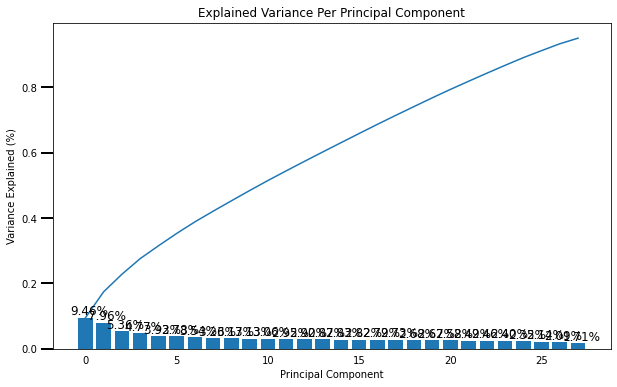

In [36]:
def pca_plot(pca):
    '''
    Creates a scree plot associated with the principal components 
    
    INPUT: pca - the result of instantian of PCA in scikit learn
            
    OUTPUT:
            None
    '''
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(10, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]), va="bottom", ha="center", fontsize=12)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')
    
pca_plot(pca)

In [37]:
#Create sparse matrices to run the scikit multilearn algorithms

X_train_pca = lil_matrix(X_train_pca).toarray()
y_train = lil_matrix(y_train).toarray()
X_test_pca = lil_matrix(X_test_pca).toarray()
y_test = lil_matrix(y_test).toarray()

In [57]:
# using binary relevance
# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
start_time = time.time()

BR_classifier = BinaryRelevance(GaussianNB())
# train
BR_classifier.fit(X_train, y_train)
# predict
predictions = BR_classifier.predict(X_test)
# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))

from sklearn.metrics import multilabel_confusion_matrix

# Calculate multilabel confusion matrix
conf_matrix_multilabel = multilabel_confusion_matrix(y_test, predictions)

# Print confusion matrix for each label
for i, conf_matrix in enumerate(conf_matrix_multilabel):
    print(f"Confusion Matrix for label {i}:")
    print(conf_matrix)

print("--- Run time: %s mins ---" % np.round(((time.time() - start_time)/60),2))


Accuracy =  0.681452581032413
Confusion Matrix for label 0:
[[7791   81]
 [ 119 8669]]
Confusion Matrix for label 1:
[[8798 3707]
 [   8 4147]]
Confusion Matrix for label 2:
[[11413  1530]
 [    0  3717]]
--- Run time: 0.01 mins ---


In [39]:
# initialize classifier chains multi-label classifier
# with a gaussian naive bayes base classifier
start_time = time.time()

CC_classifier = ClassifierChain(GaussianNB())

# train
CC_classifier.fit(X_train, y_train)

# predict
predictions = CC_classifier.predict(X_test)

accuracy_score(y_test,predictions)
print('Test accuracy is {}'.format(accuracy_score(y_test, predictions)))

# Calculate multilabel confusion matrix
conf_matrix_multilabel = multilabel_confusion_matrix(y_test, predictions)

# Print confusion matrix for each label
for i, conf_matrix in enumerate(conf_matrix_multilabel):
    print(f"Confusion Matrix for label {i}:")
    print(conf_matrix)

print("--- Run time: %s mins ---" % np.round(((time.time() - start_time)/60),2))

Test accuracy is 0.7948379351740696
Confusion Matrix for label 0:
[[7791   81]
 [ 119 8669]]
Confusion Matrix for label 1:
[[9185 3320]
 [  81 4074]]
Confusion Matrix for label 2:
[[12943     0]
 [ 3218   499]]
--- Run time: 0.01 mins ---


In [40]:
# initialize Label Powerset multi-label classifier
# with a gaussian naive bayes base classifier
start_time = time.time()

LP_classifier = LabelPowerset(GaussianNB())

# train
LP_classifier.fit(X_train, y_train)

# predict
predictions = LP_classifier.predict(X_test)

accuracy_score(y_test,predictions)
print('Test accuracy is {}'.format(accuracy_score(y_test, predictions)))

# Calculate multilabel confusion matrix
conf_matrix_multilabel = multilabel_confusion_matrix(y_test, predictions)

# Print confusion matrix for each label
for i, conf_matrix in enumerate(conf_matrix_multilabel):
    print(f"Confusion Matrix for label {i}:")
    print(conf_matrix)

print("--- Run time: %s mins ---" % np.round(((time.time() - start_time)/60),2))

Test accuracy is 0.8893157262905163
Confusion Matrix for label 0:
[[7857   15]
 [ 330 8458]]
Confusion Matrix for label 1:
[[12203   302]
 [ 1514  2641]]
Confusion Matrix for label 2:
[[11416  1527]
 [    0  3717]]
--- Run time: 0.03 mins ---


In [41]:
start_time = time.time()

MLKNN_classifier = MLkNN(k=1)

# train
MLKNN_classifier.fit(X_train_pca, y_train)

# predict mlknn = 1
predictions = MLKNN_classifier.predict(X_test_pca)

#print(predictions)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))

# Calculate multilabel confusion matrix
conf_matrix_multilabel = multilabel_confusion_matrix(y_test, predictions)

# Print confusion matrix for each label
for i, conf_matrix in enumerate(conf_matrix_multilabel):
    print(f"Confusion Matrix for label {i}:")
    print(conf_matrix)

print("--- Run time: %s mins ---" % np.round(((time.time() - start_time)/60),2))

C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Accuracy =  1.0
Confusion Matrix for label 0:
[[7872    0]
 [   0 8788]]
Confusion Matrix for label 1:
[[12505     0]
 [    0  4155]]
Confusion Matrix for label 2:
[[12943     0]
 [    0  3717]]
--- Run time: 0.38 mins ---


In [43]:
# Calculate total number of labels
total_labels = np.sum(y_test != 0)

total_labels

16660